In [37]:
import pandas as pd 
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("out.dat", sep=' ',names=["Easting","Northing","Obs","Calc","Residuals"])
df

,Easting,Northing,Obs,Calc,Residuals
0,535843.289625,4.069294e+06,-0.220017,1.647337,-1.867354
1,535843.223230,4.069297e+06,0.060021,1.659524,-1.599504
2,535843.156118,4.069299e+06,0.439363,1.671385,-1.232022
3,535843.088408,4.069301e+06,0.419423,1.682979,-1.263556
4,535843.021542,4.069303e+06,0.199467,1.694221,-1.494754
...,...,...,...,...,...
503,535815.605398,4.070391e+06,0.125328,0.979684,-0.854356
504,535815.491836,4.070393e+06,-0.100536,0.969388,-1.069924
505,535815.371334,4.070395e+06,-0.526322,0.959233,-1.485555
506,535815.243523,4.070397e+06,-0.550862,0.949149,-1.500011


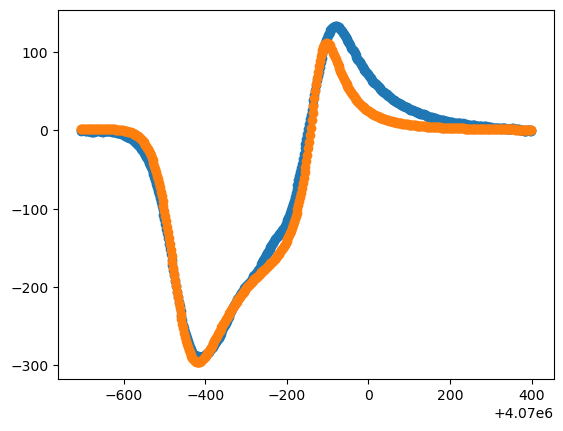

In [39]:
plt.scatter(df.Northing,df.Obs)
plt.scatter(df.Northing,df.Calc)

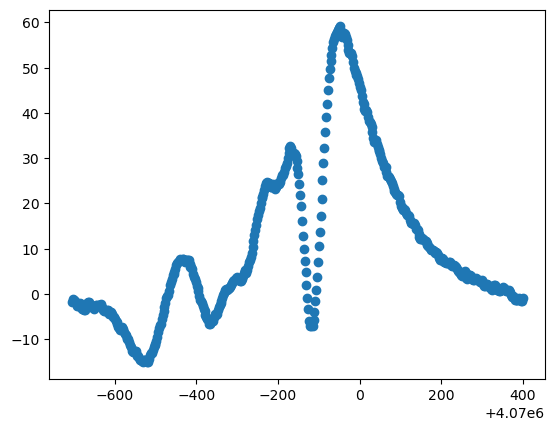

In [40]:
plt.scatter(df.Northing,df.Residuals)

In [41]:
for i in range(len(df)):
    print(df[i].Residuals)

KeyError: 0